# Global Cancer Paitients

This dataset contains global cancer patient data reported from 2015 to 2024, designed to simulate the key factors influencing cancer diagnosis, treatment, and survival. It includes a variety of features that are commonly studied in the medical field, such as age, gender, cancer type, environmental factors, and lifestyle behaviors. The dataset is perfect for:



Key Features:
Age: Patient's age (20-90 years)

Gender: Male, Female, or Other

Country/Region: Country or region of the patient

Cancer Type: Various types of cancer (e.g., Breast, Lung, Colon)

Cancer Stage: Stage 0 to Stage IV

Risk Factors: Includes genetic risk, air pollution, alcohol use, smoking, obesity, etc.

Treatment Cost: Estimated cost of cancer treatment (in USD)

Survival Years: Years survived since diagnosis

Severity Score: A composite score representing cancer severity



## Dataset & Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv(r'Global Cancer Patients.csv')


## Explore Dataset

In [3]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           49176 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            43186 non-null  float64
 8   Smoking                47954 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         46919 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

### Choose Stratified Sample For Dataset

In [5]:
# fraction = 0.5
# df = df.groupby(['Cancer_Type','Year','Country_Region','Gender','Cancer_Stage'],
#                                group_keys=False).apply(lambda x: x.sample(frac=fraction, random_state=42))


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,54.421540,20.224451,20.00,37.000,54.00,72.00,89.00
Year,50000.0,2019.480520,2.871485,2015.00,2017.000,2019.00,2022.00,2024.00
Genetic_Risk,49176.0,5.002967,2.886336,0.00,2.500,5.00,7.50,10.00
Air_Pollution,50000.0,5.010126,2.888399,0.00,2.500,5.00,7.50,10.00
Alcohol_Use,43186.0,5.014908,2.887525,0.00,2.500,5.00,7.50,10.00
Smoking,47954.0,4.985776,2.880943,0.00,2.500,5.00,7.50,10.00
Obesity_Level,50000.0,4.991176,2.894504,0.00,2.500,5.00,7.50,10.00
Treatment_Cost_USD,50000.0,52467.298239,27363.229379,5000.05,28686.225,52474.31,76232.72,99999.84
Survival_Years,46919.0,5.005128,2.882067,0.00,2.500,5.00,7.50,10.00
Target_Severity_Score,50000.0,4.951207,1.199677,0.90,4.120,4.95,5.78,9.16


In [7]:
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


## (Data Cleaning & Analaysis)

### Drop Duplicates

In [8]:
df =df.drop_duplicates()

### Handle Missing Values

In [9]:
df.isnull().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country_Region,0
Year,0
Genetic_Risk,824
Air_Pollution,0
Alcohol_Use,6814
Smoking,2046
Obesity_Level,0


In [10]:
#percentage for missing values
percentage = (df.isnull().sum()/len(df))*100
print(percentage)

Patient_ID                0.000
Age                       0.000
Gender                    0.000
Country_Region            0.000
Year                      0.000
Genetic_Risk              1.648
Air_Pollution             0.000
Alcohol_Use              13.628
Smoking                   4.092
Obesity_Level             0.000
Cancer_Type               0.000
Cancer_Stage              0.000
Treatment_Cost_USD        0.000
Survival_Years            6.162
Target_Severity_Score     0.000
dtype: float64


In [11]:
print(percentage[percentage > 0])

Genetic_Risk       1.648
Alcohol_Use       13.628
Smoking            4.092
Survival_Years     6.162
dtype: float64


Now We Have Four Tables Has Missing Values ,

#### Handle Genetic_Risk Column

In [12]:
#remove missing values in Genetic_Risk
df = df.dropna(subset=['Genetic_Risk'])

#### Handle Smoking Column

In [13]:
#replace missing values using knn
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Smoking'] = imputer.fit_transform(pd.DataFrame(df['Smoking']))

#### Handle Survival_Years Column

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Survival_Years'] = imputer.fit_transform(pd.DataFrame(df['Survival_Years']))

#### Handle Alcohol_Use Column

In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['Alcohol_Use'] = imputer.fit_transform(df[['Alcohol_Use']])

### Check For Outlier

,0
Age,"Axes(0.125,0.53;0.133621x0.35)"
Year,"Axes(0.285345,0.53;0.133621x0.35)"
Genetic_Risk,"Axes(0.44569,0.53;0.133621x0.35)"
Air_Pollution,"Axes(0.606034,0.53;0.133621x0.35)"
Alcohol_Use,"Axes(0.766379,0.53;0.133621x0.35)"
Smoking,"Axes(0.125,0.11;0.133621x0.35)"
Obesity_Level,"Axes(0.285345,0.11;0.133621x0.35)"
Treatment_Cost_USD,"Axes(0.44569,0.11;0.133621x0.35)"
Survival_Years,"Axes(0.606034,0.11;0.133621x0.35)"
Target_Severity_Score,"Axes(0.766379,0.11;0.133621x0.35)"


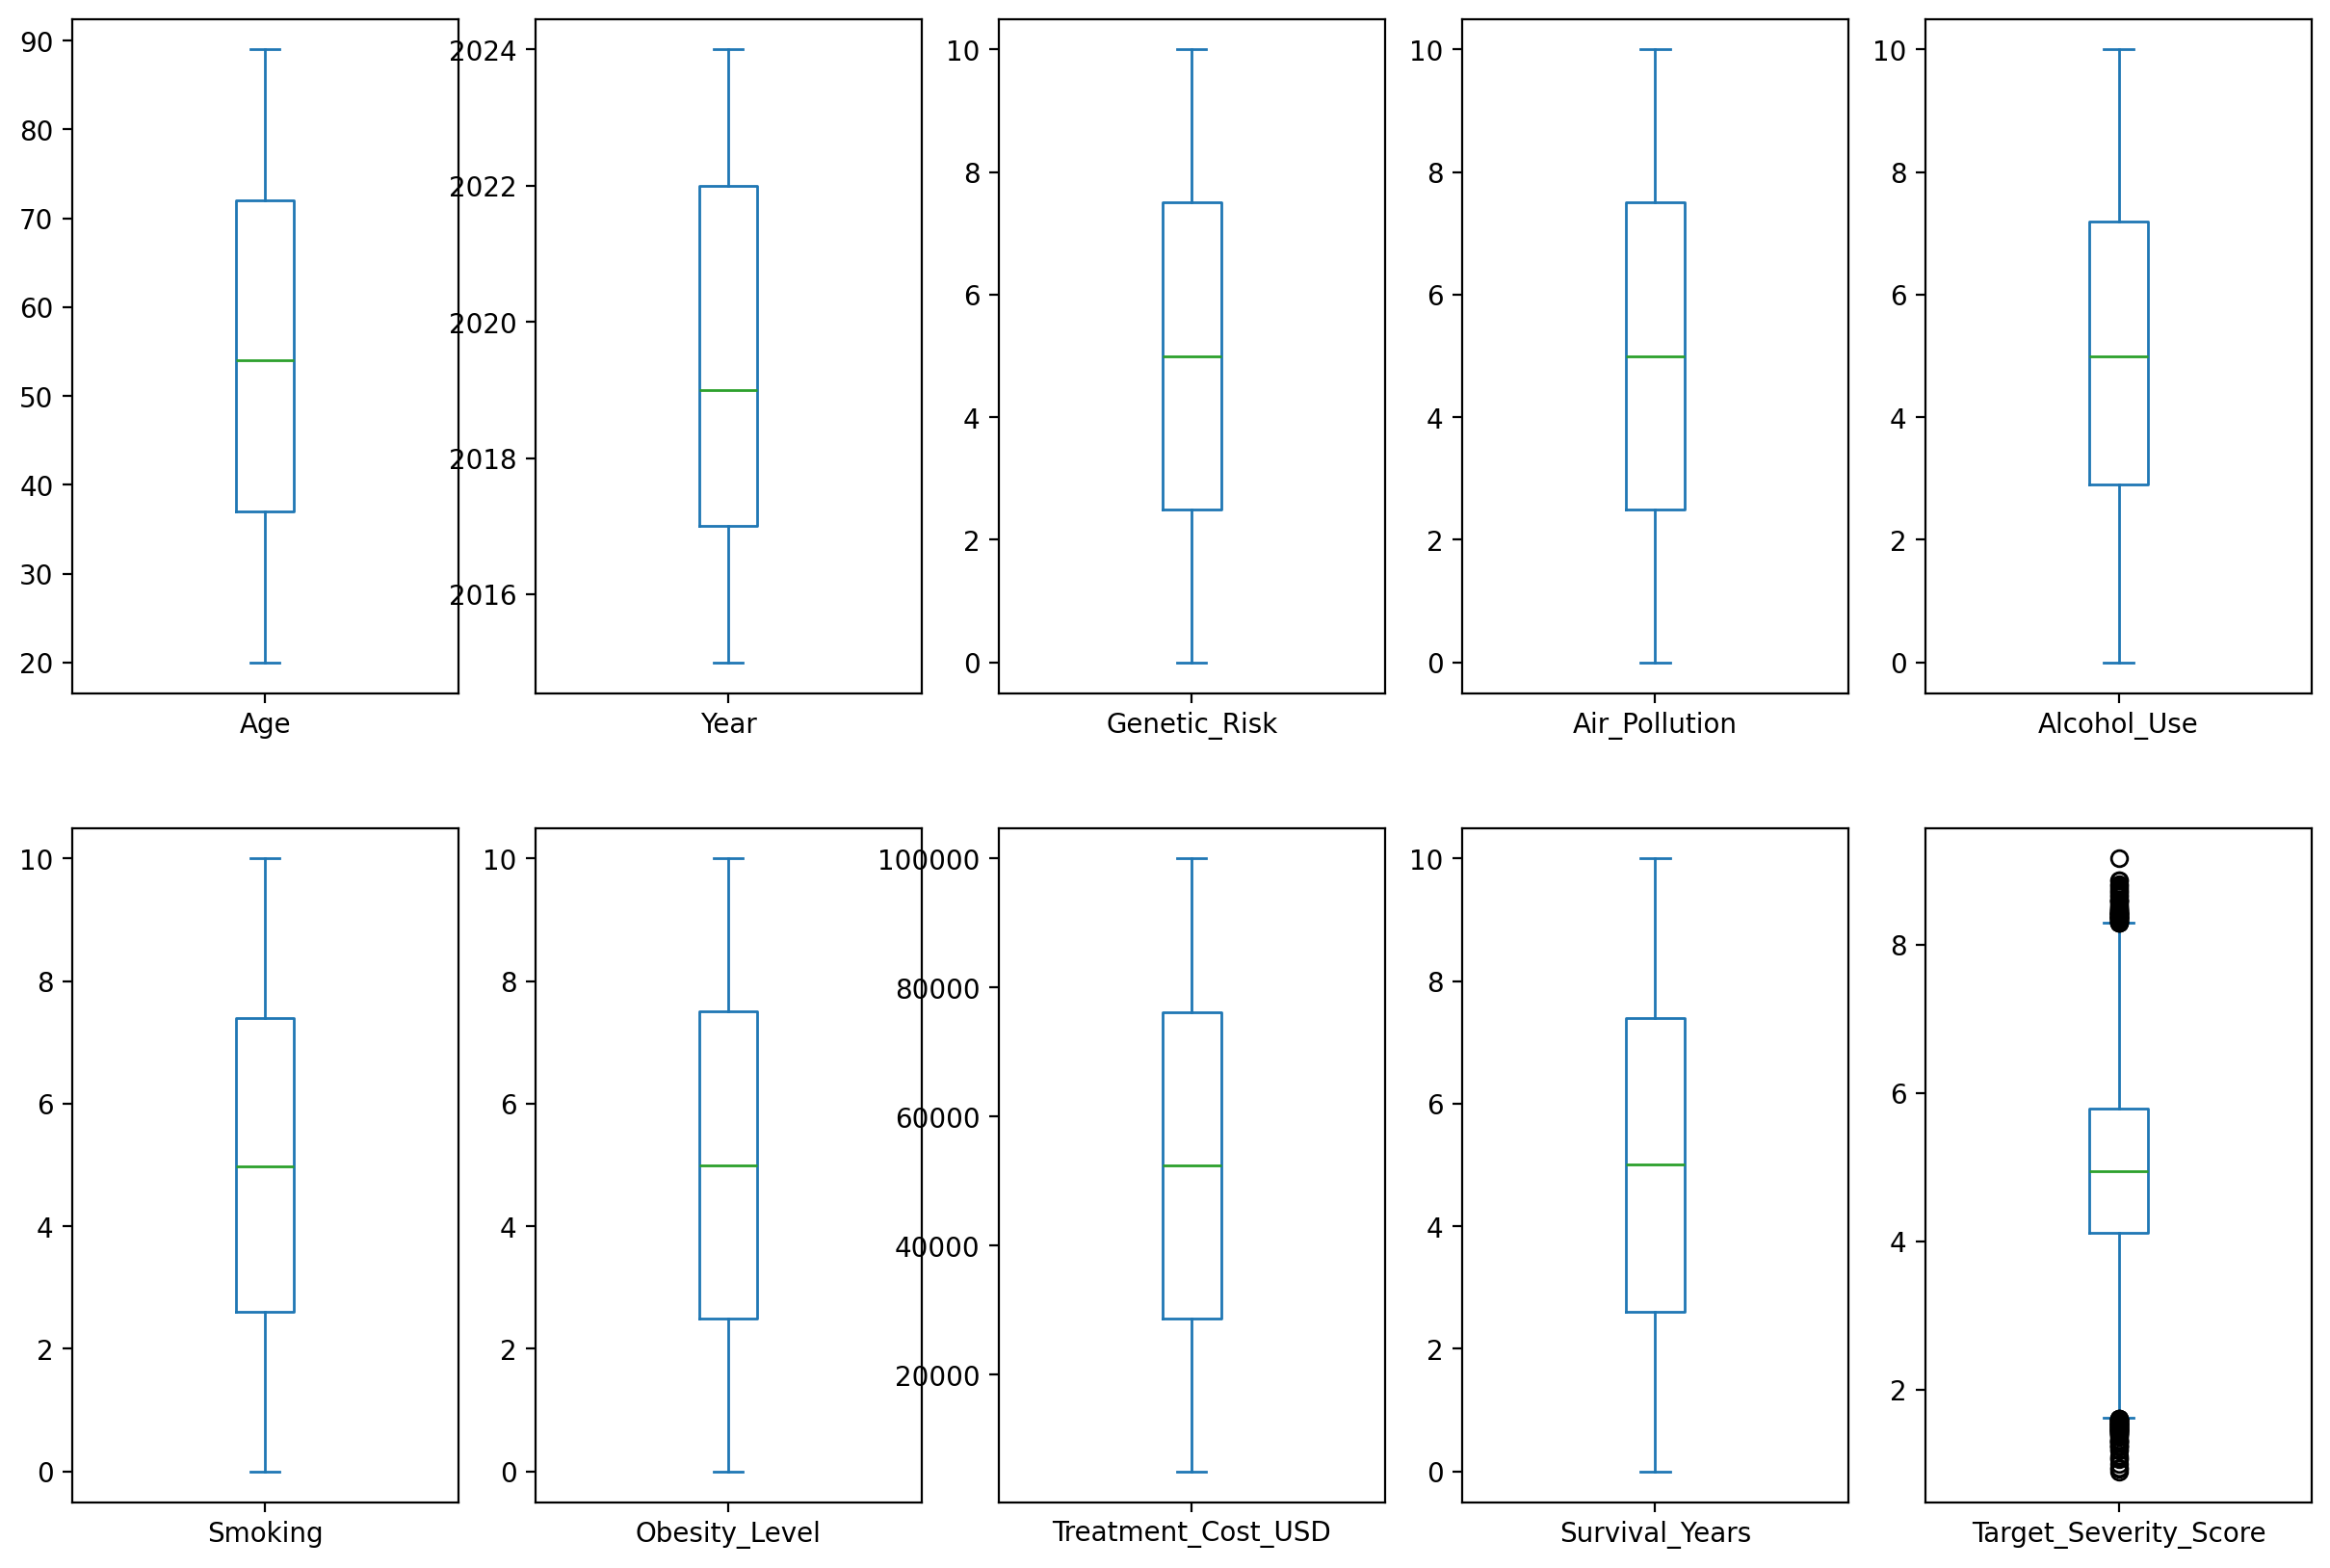

In [16]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(15,10))

Now We Notice That all Features Has No Outliers but the target has outlier

#### Handle Outliers in Target

by using IQR To Remove Outliers

In [17]:
Q1 = df['Target_Severity_Score'].quantile(0.25)
Q3 =df['Target_Severity_Score'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df = df[
    (df['Target_Severity_Score'] >= (Q1 - 1.5 * IQR)) &
    (df['Target_Severity_Score'] <= (Q3 + 1.5 * IQR))
]


1.67


,0
Age,"Axes(0.125,0.53;0.133621x0.35)"
Year,"Axes(0.285345,0.53;0.133621x0.35)"
Genetic_Risk,"Axes(0.44569,0.53;0.133621x0.35)"
Air_Pollution,"Axes(0.606034,0.53;0.133621x0.35)"
Alcohol_Use,"Axes(0.766379,0.53;0.133621x0.35)"
Smoking,"Axes(0.125,0.11;0.133621x0.35)"
Obesity_Level,"Axes(0.285345,0.11;0.133621x0.35)"
Treatment_Cost_USD,"Axes(0.44569,0.11;0.133621x0.35)"
Survival_Years,"Axes(0.606034,0.11;0.133621x0.35)"
Target_Severity_Score,"Axes(0.766379,0.11;0.133621x0.35)"


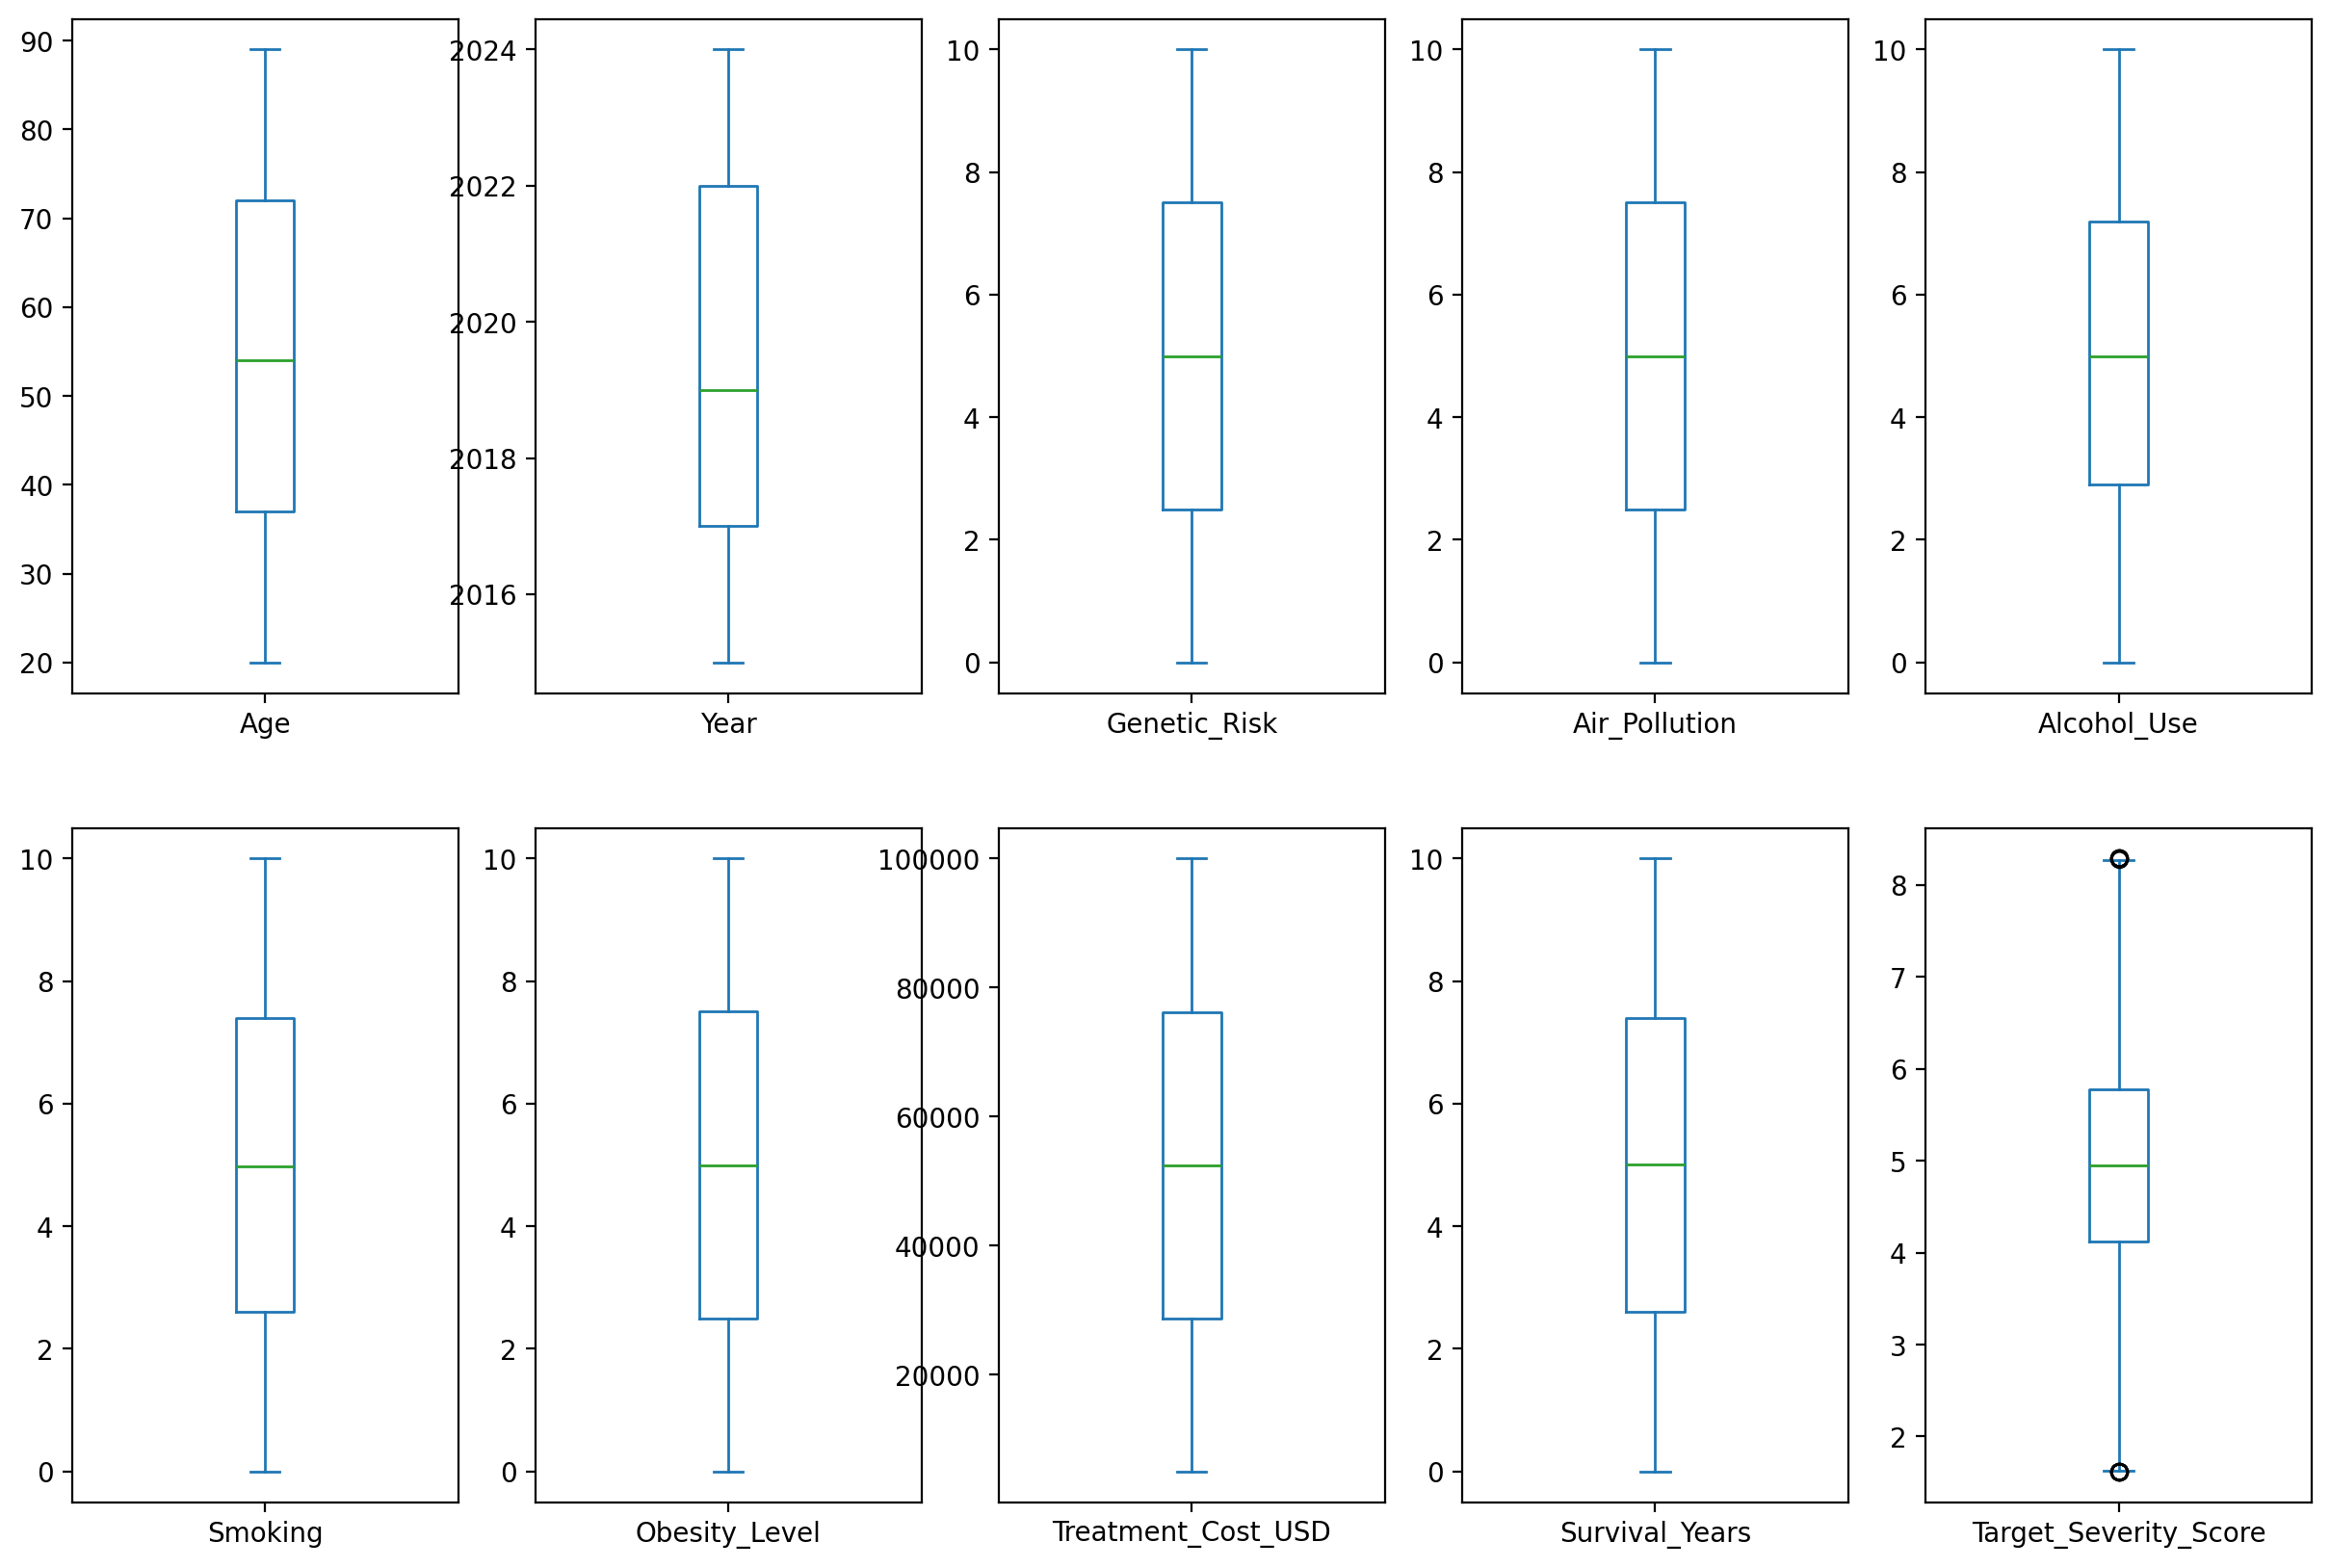

In [18]:
df.plot(kind='box', subplots=True,layout=(2,5),figsize=(15,10))

### Visualizations & Insights

#### correlation matrix

<Axes: >

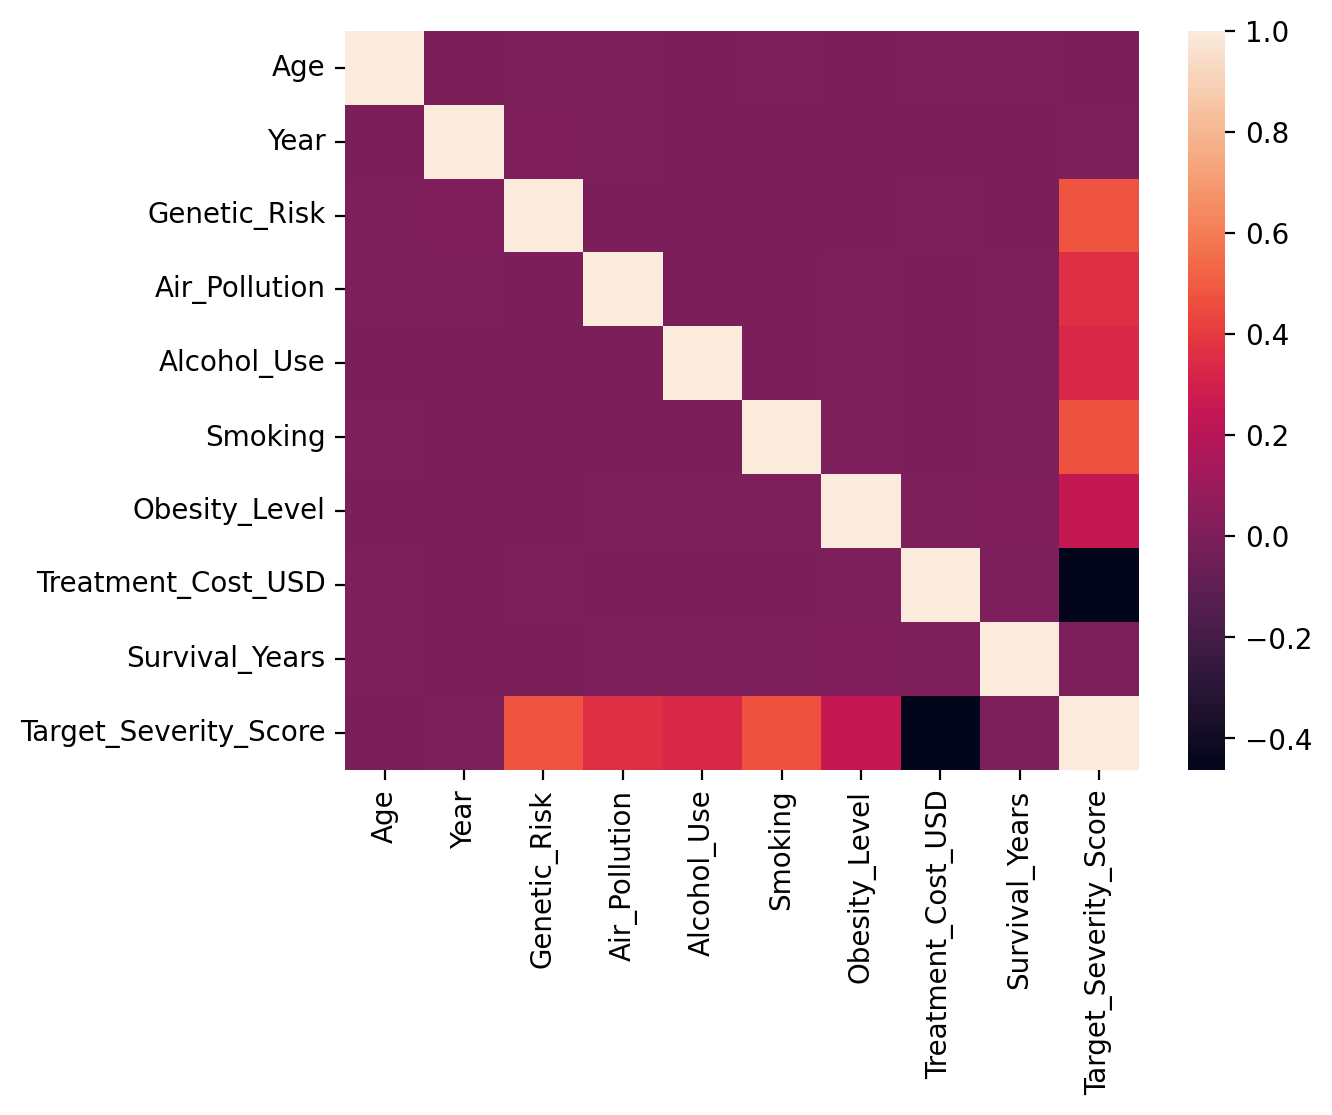

In [19]:
corr =df.select_dtypes(include=np.number).corr()
sns.heatmap(corr)

#### Target Distribution

<Axes: xlabel='Target_Severity_Score', ylabel='Count'>

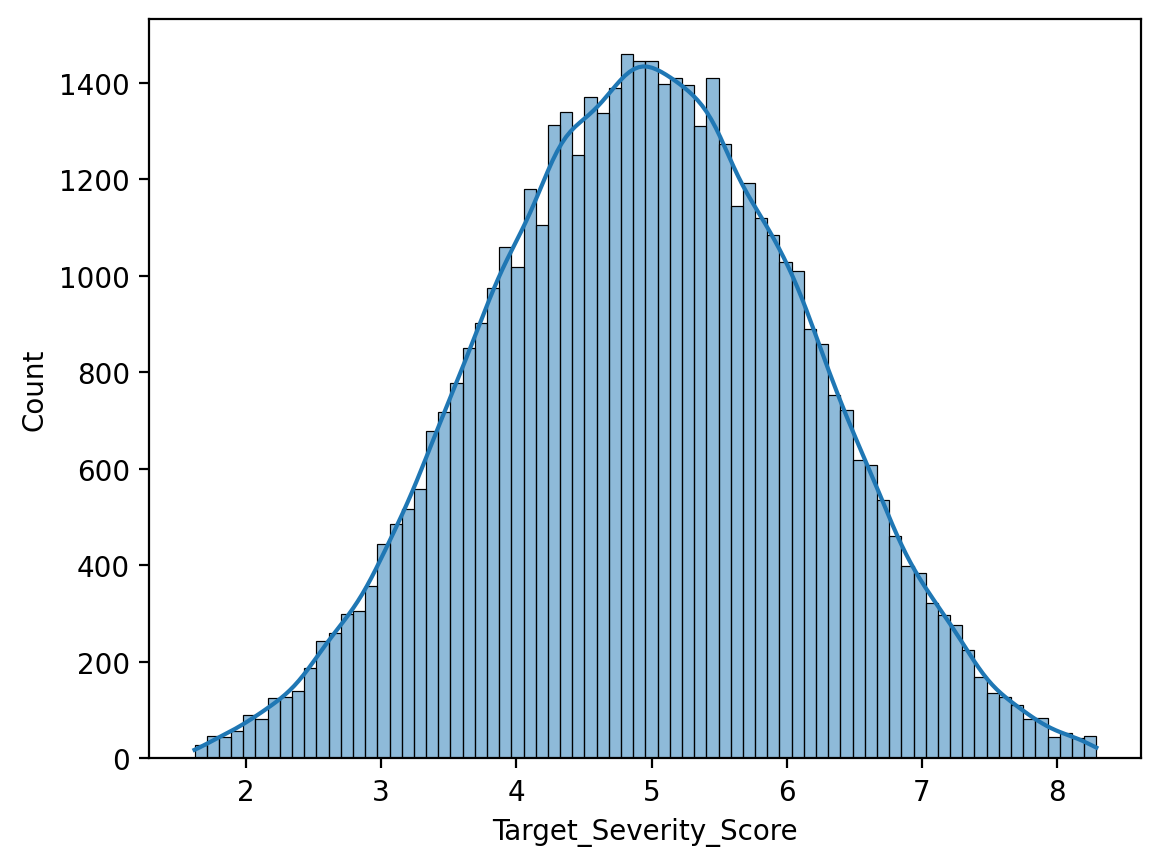

In [20]:
sns.histplot(df['Target_Severity_Score'],kde =True)

#### Cancer Stage & Cancer Type Count

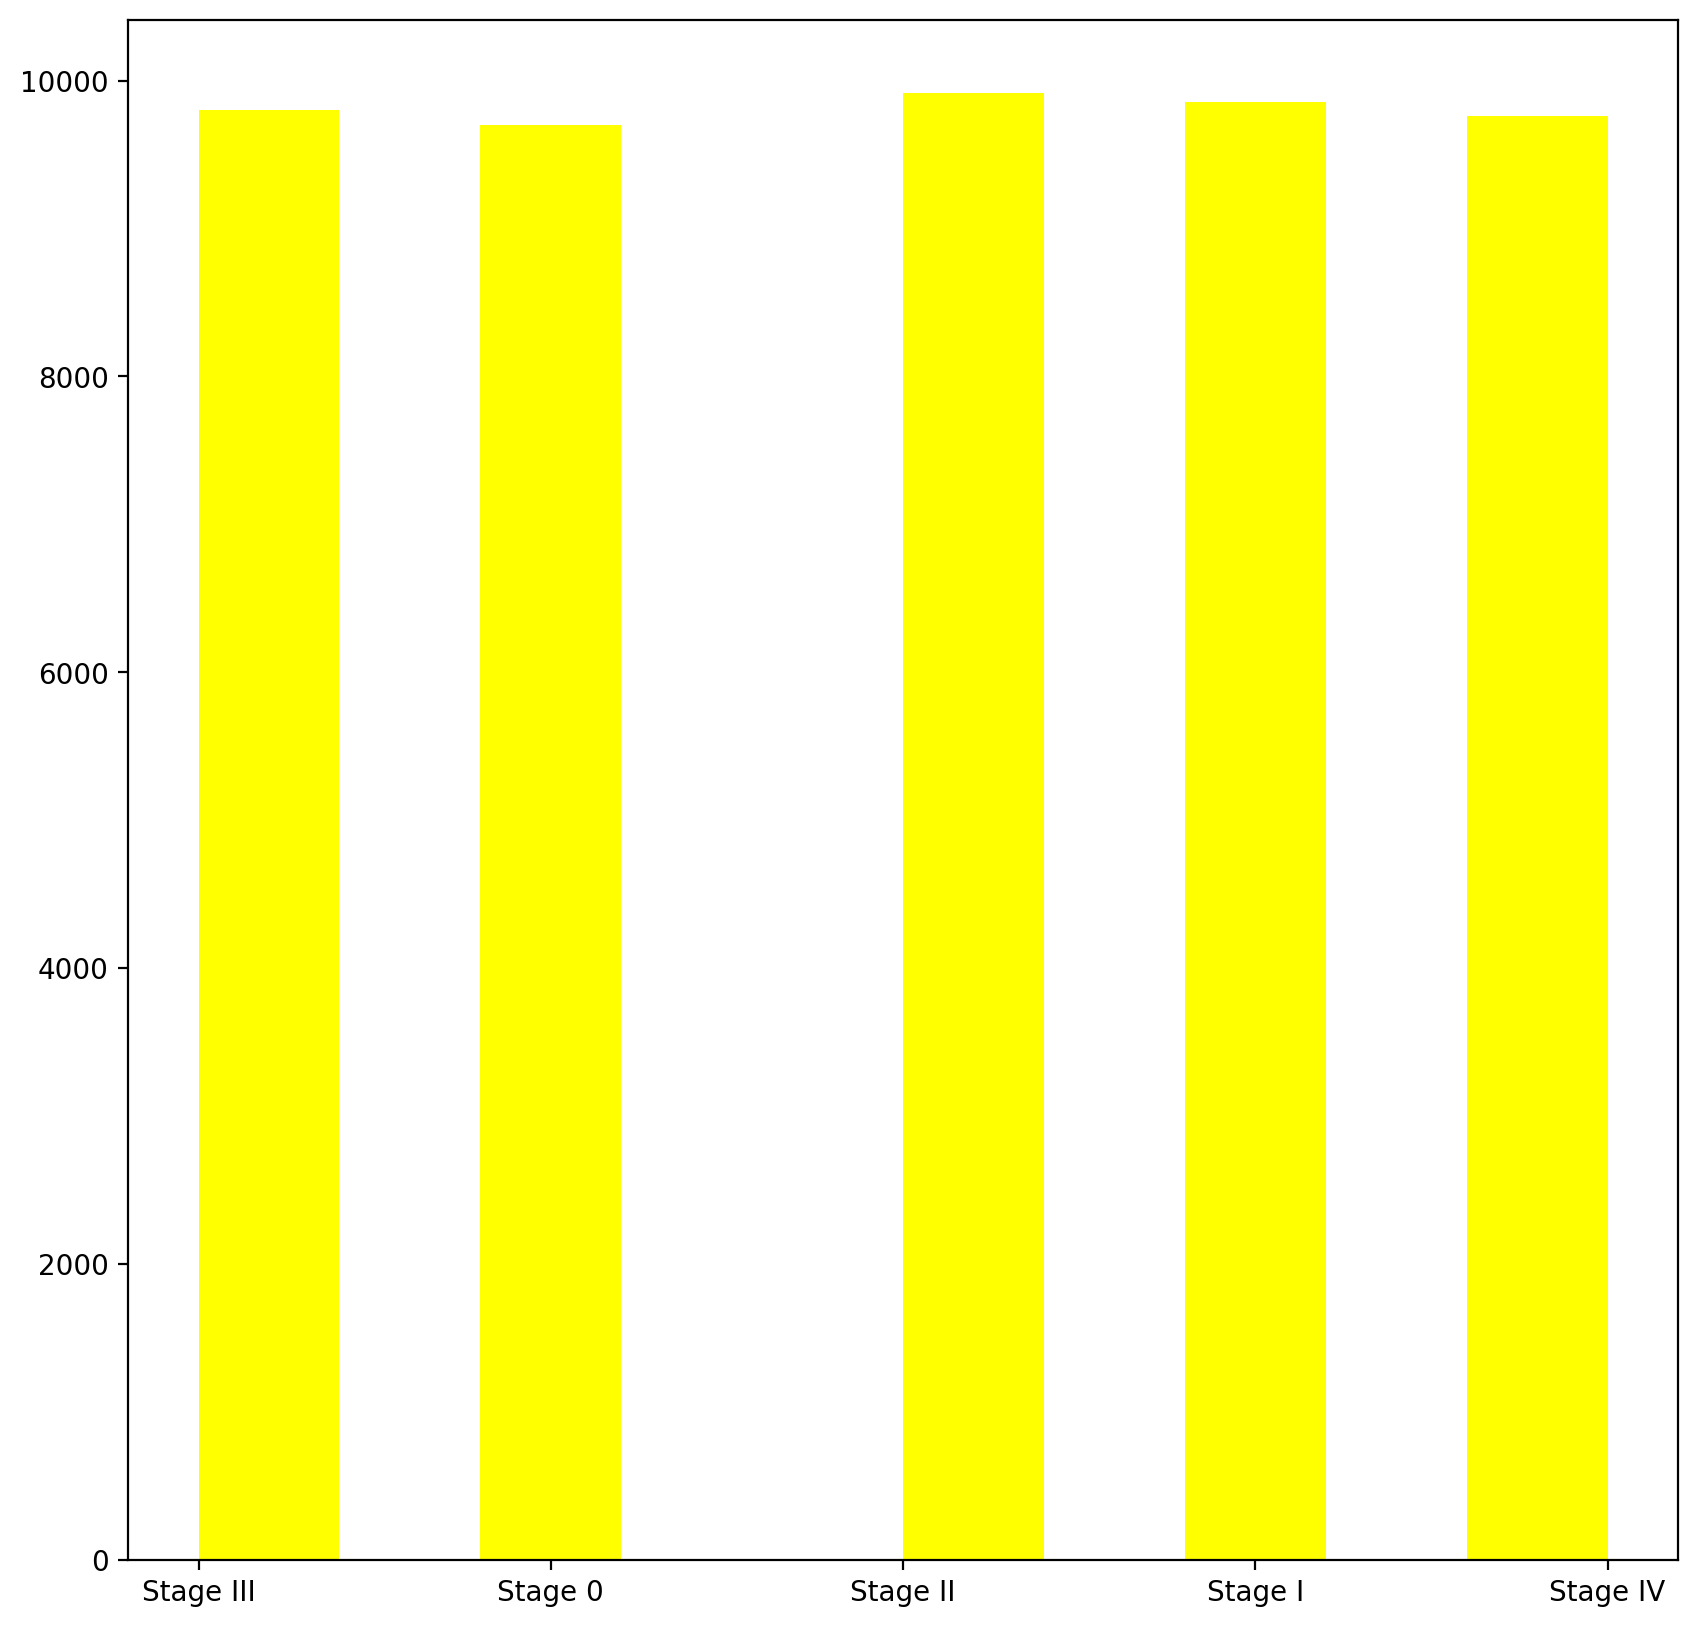

In [21]:
plt.figure(figsize=(10,10))

plt.hist(df['Cancer_Stage'],bins=10,color='yellow')
plt.show()

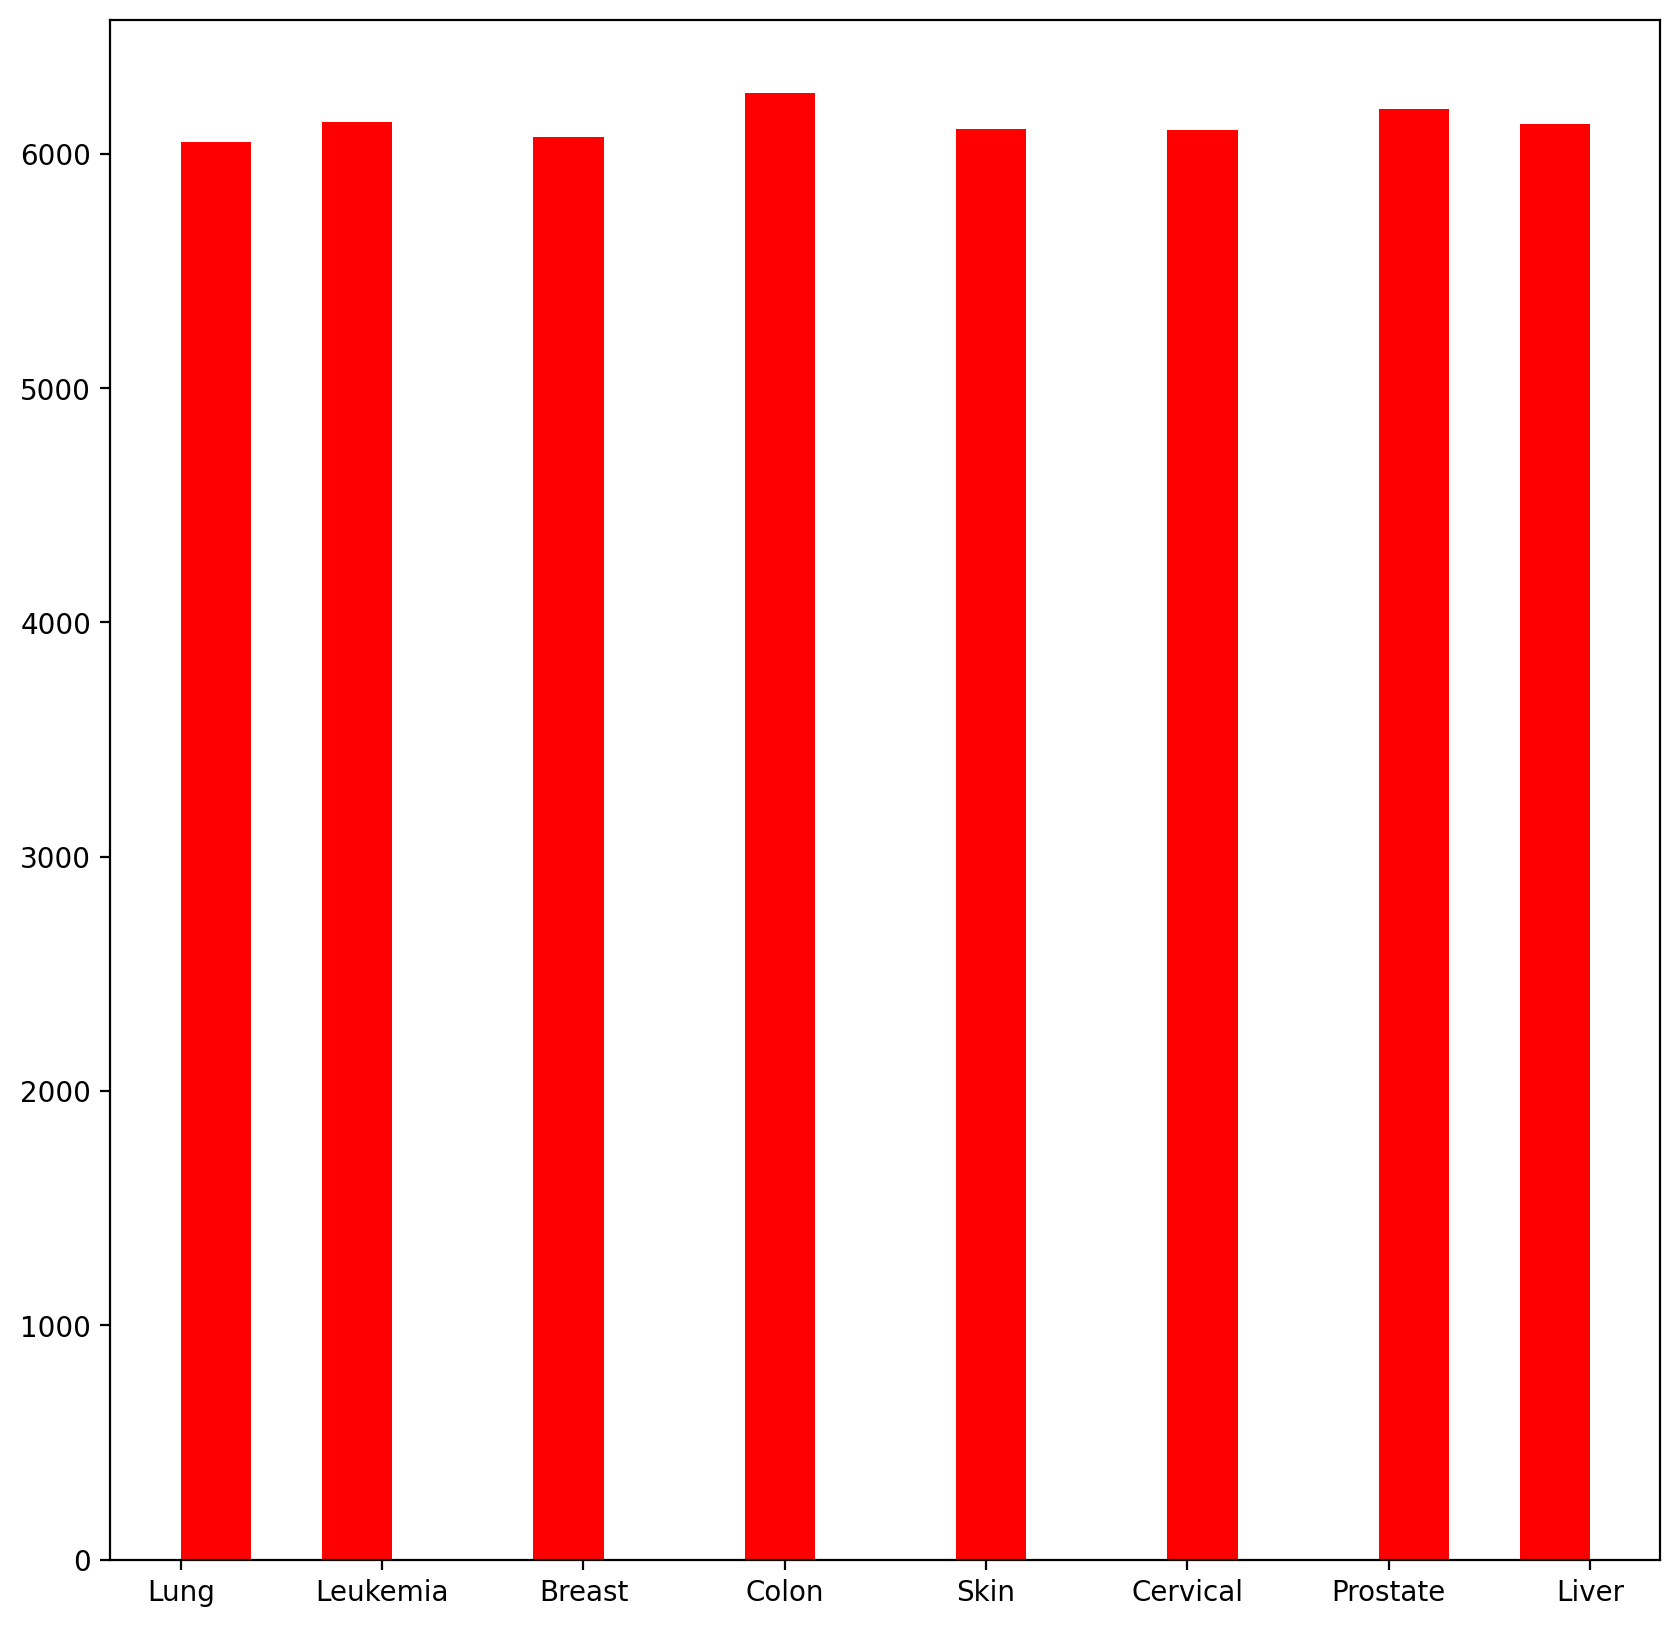

In [22]:
plt.figure(figsize=(10,10))
plt.hist(df['Cancer_Type'],bins=20,color='red')
plt.show()

#### Pie Chart

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49042 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             49042 non-null  object 
 1   Age                    49042 non-null  int64  
 2   Gender                 49042 non-null  object 
 3   Country_Region         49042 non-null  object 
 4   Year                   49042 non-null  int64  
 5   Genetic_Risk           49042 non-null  float64
 6   Air_Pollution          49042 non-null  float64
 7   Alcohol_Use            49042 non-null  float64
 8   Smoking                49042 non-null  float64
 9   Obesity_Level          49042 non-null  float64
 10  Cancer_Type            49042 non-null  object 
 11  Cancer_Stage           49042 non-null  object 
 12  Treatment_Cost_USD     49042 non-null  float64
 13  Survival_Years         49042 non-null  float64
 14  Target_Severity_Score  49042 non-null  float64
dtypes: floa

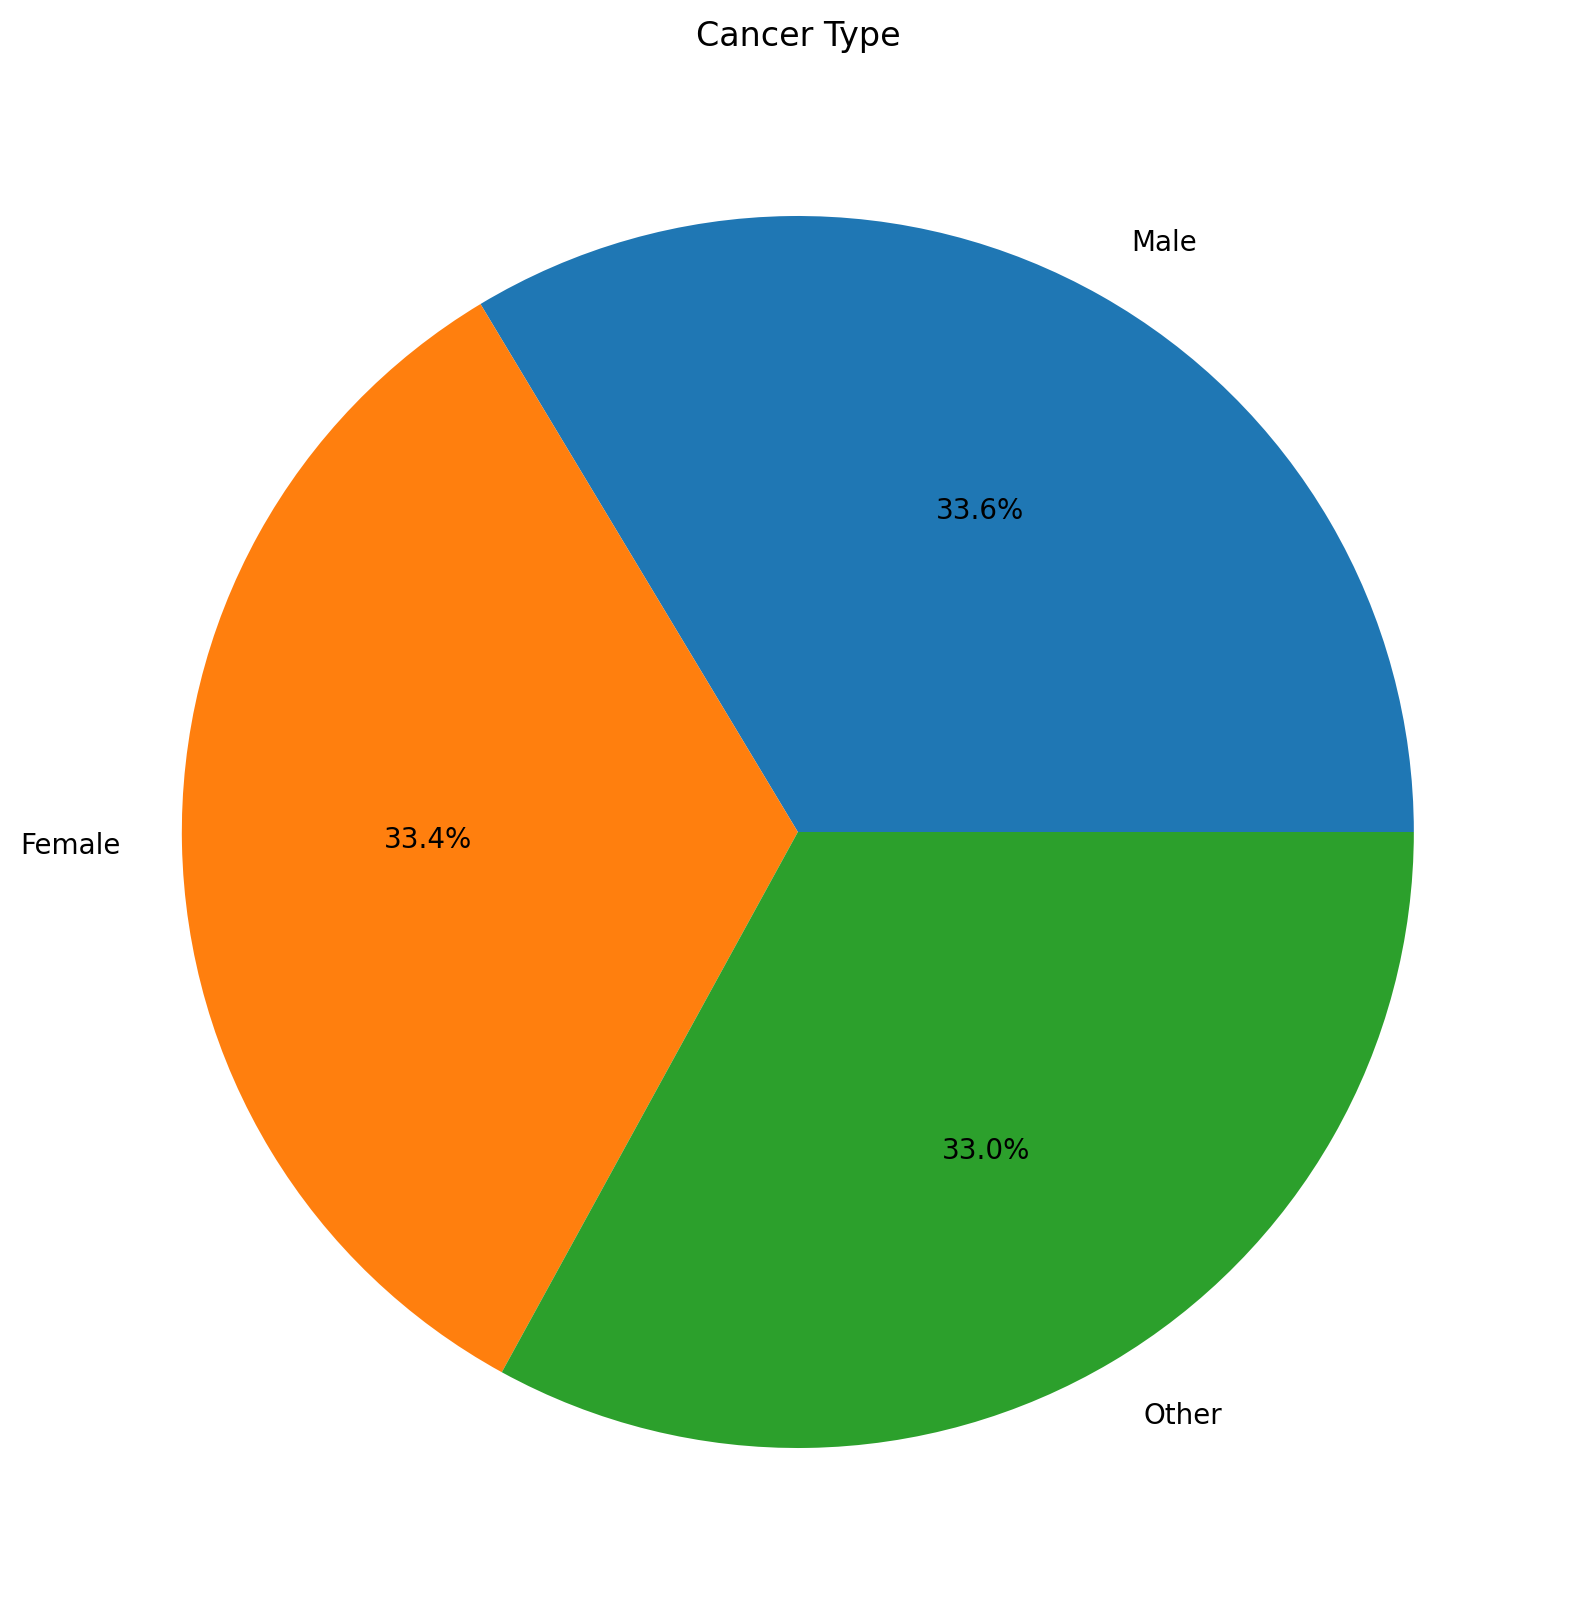

In [24]:
plt.figure(figsize=(10,10))
plt.title('Cancer Type')
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.1f%%')
plt.show()

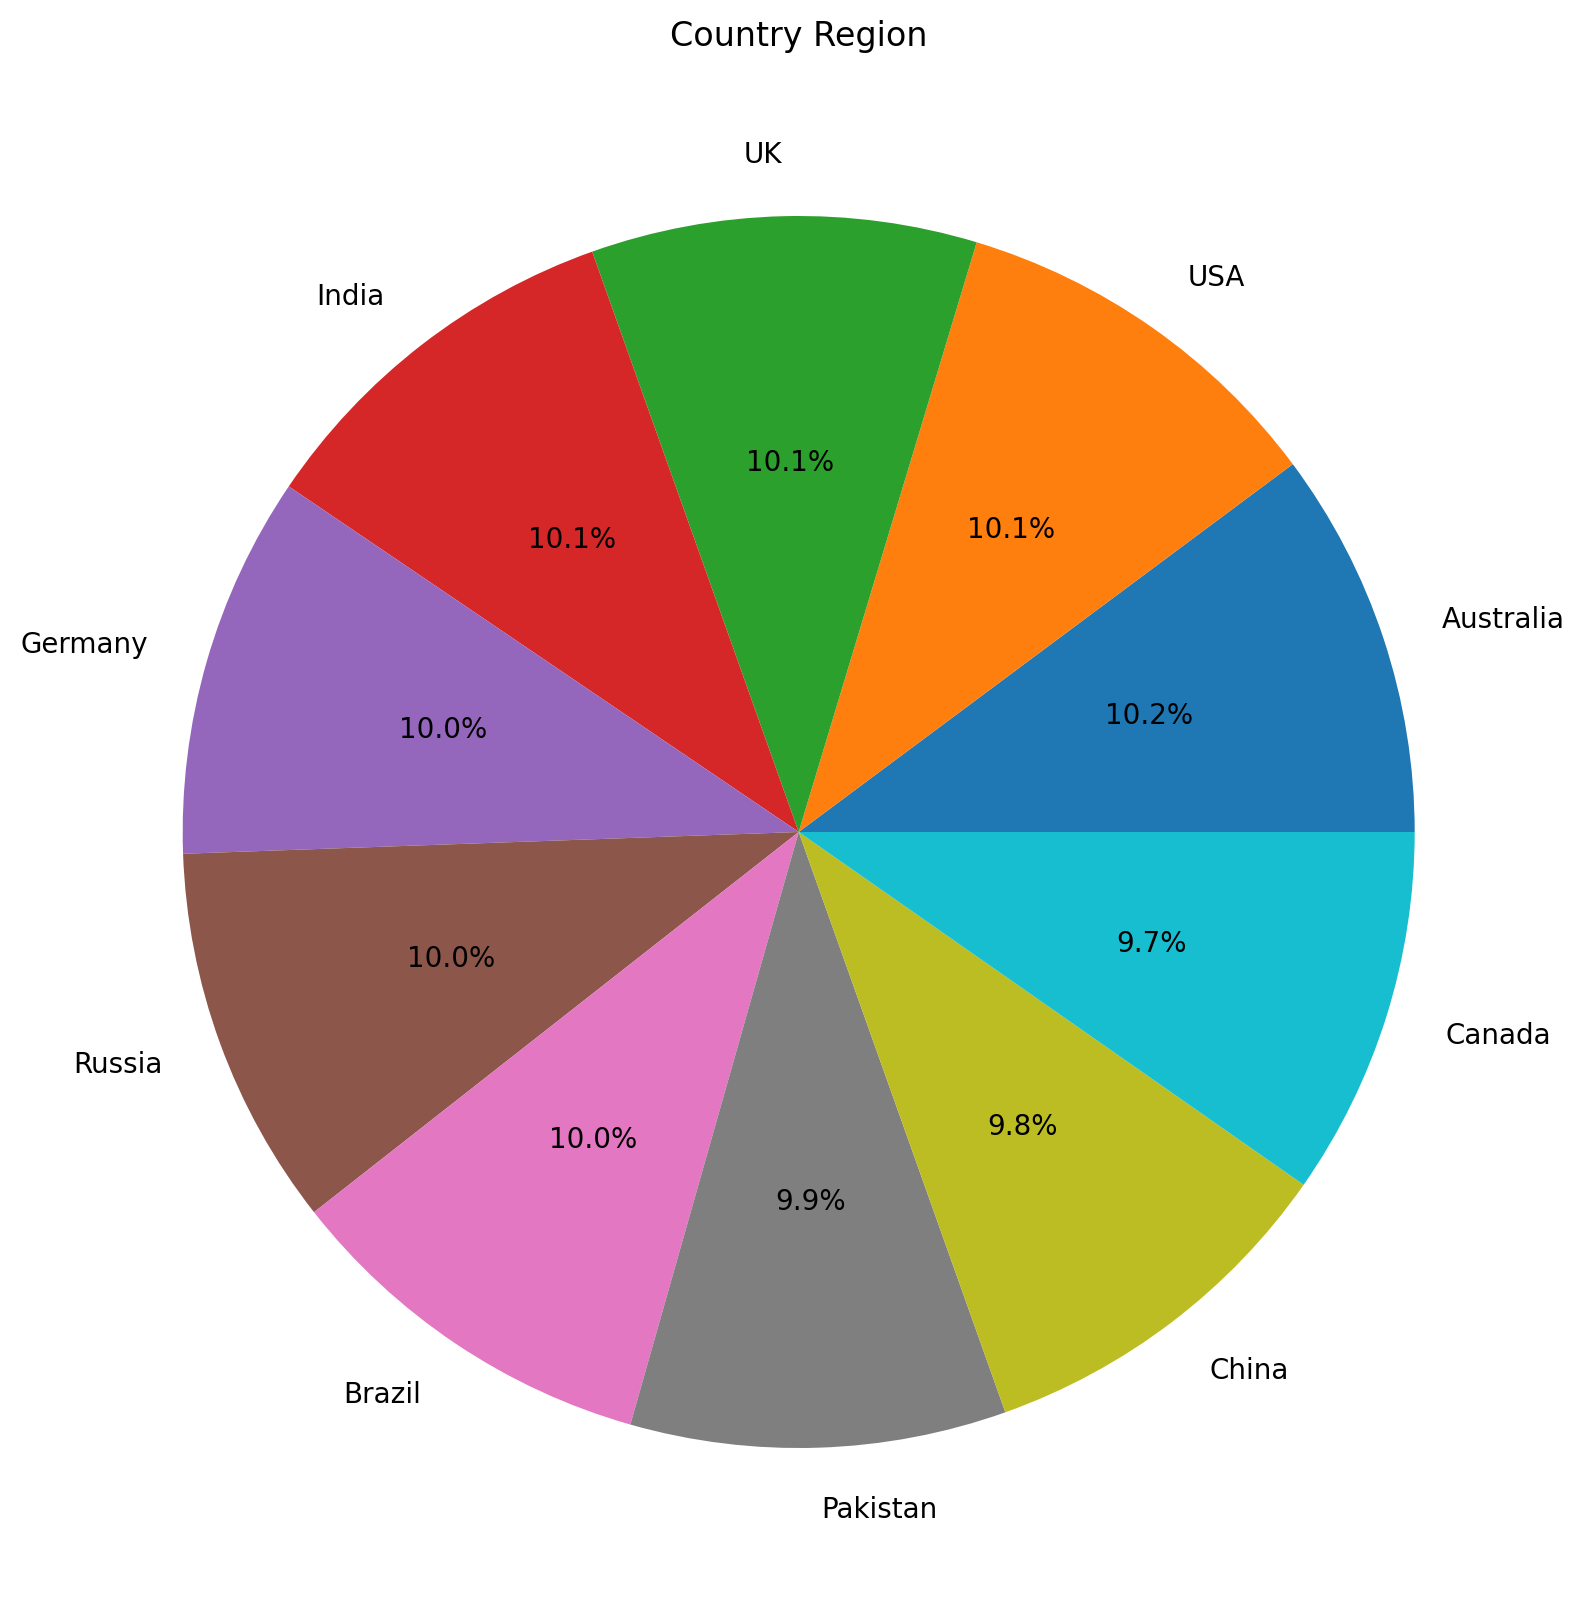

In [25]:
#pie chat for country region
plt.figure(figsize=(10,10))
plt.title('Country Region')
plt.pie(df['Country_Region'].value_counts(),labels=df['Country_Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

### Check for imbalanced Category

In [26]:
df['Gender'].value_counts()

,count
Gender,
Male,16485
Female,16384
Other,16173


In [27]:
df['Country_Region'].value_counts()

,count
Country_Region,
Australia,4995
USA,4977
UK,4957
India,4943
Germany,4925
Russia,4916
Brazil,4908
Pakistan,4831
China,4830


In [28]:
df['Cancer_Type'].value_counts()

,count
Cancer_Type,
Colon,6260
Prostate,6192
Leukemia,6137
Liver,6127
Skin,6104
Cervical,6101
Breast,6070
Lung,6051


In [29]:
df['Cancer_Stage'].value_counts()

,count
Cancer_Stage,
Stage II,9917
Stage I,9858
Stage III,9801
Stage IV,9763
Stage 0,9703


We Notice That There is no Imbanaced Category !!

## Preprocessing for Modeling

### Dataset Overview

In [30]:
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49042 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             49042 non-null  object 
 1   Age                    49042 non-null  int64  
 2   Gender                 49042 non-null  object 
 3   Country_Region         49042 non-null  object 
 4   Year                   49042 non-null  int64  
 5   Genetic_Risk           49042 non-null  float64
 6   Air_Pollution          49042 non-null  float64
 7   Alcohol_Use            49042 non-null  float64
 8   Smoking                49042 non-null  float64
 9   Obesity_Level          49042 non-null  float64
 10  Cancer_Type            49042 non-null  object 
 11  Cancer_Stage           49042 non-null  object 
 12  Treatment_Cost_USD     49042 non-null  float64
 13  Survival_Years         49042 non-null  float64
 14  Target_Severity_Score  49042 non-null  float64
dtypes: floa

### Drop Unecessary Columns

In [32]:
df.drop(['Patient_ID'],axis=1,inplace=True)

In [33]:
df.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


### Categorical Columns

In [34]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage'], dtype='object')


#### Categorical Columns Encoding

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

categorical_columns_label = ['Gender', 'Cancer_Stage', 'Year'] # Label encoding
df_categorical = df[categorical_columns_label]

for column in categorical_columns_label:
    df_categorical[column] = LabelEncoder().fit_transform(df_categorical[column])


In [36]:
df_categorical.head()

,Gender,Cancer_Stage,Year
0,1,3,6
1,1,0,6
2,1,2,8
3,1,1,0
4,0,3,2


In [37]:
categorical_columns_ohe = ['Country_Region', 'Cancer_Type'] # One hot encoding
df_categorical[categorical_columns_ohe] = df[categorical_columns_ohe]

df_categorical = pd.concat([df_categorical[categorical_columns_label], pd.get_dummies(df_categorical[categorical_columns_ohe],prefix_sep='_')], axis=1)

df_categorical.head()

,Gender,Cancer_Stage,Year,Country_Region_Australia,Country_Region_Brazil,Country_Region_Canada,Country_Region_China,Country_Region_Germany,Country_Region_India,Country_Region_Pakistan,Country_Region_Russia,Country_Region_UK,Country_Region_USA,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,1,3,6,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,1,0,6,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,1,2,8,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False
3,1,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
4,0,3,2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


### Numerical Columns

In [38]:
df['Year']=df['Year'].astype('object')
Target = df['Target_Severity_Score']
df.drop(['Target_Severity_Score'],axis=1,inplace=True)
numerical_columns = df.select_dtypes(include = np.number).columns
print(numerical_columns)

Index(['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years'],
      dtype='object')


#### Numerical Columns Scaling

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_numerical = df[numerical_columns]
df_numerical = scaler.fit_transform(df_numerical)
df_numerical = pd.DataFrame(df_numerical, columns=numerical_columns)
df_numerical

,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years
0,0.739130,0.64,0.28,0.95,0.09,0.87,0.609616,0.59
1,0.202899,0.13,0.45,0.37,0.39,0.63,0.079720,0.47
2,0.869565,0.74,0.79,0.24,0.47,0.01,0.020887,0.71
3,0.289855,0.17,0.29,0.48,0.35,0.27,0.657330,0.16
4,0.333333,0.51,0.28,0.23,0.67,0.05,0.768181,0.29
...,...,...,...,...,...,...,...,...
49037,0.869565,0.23,0.75,0.28,0.38,0.29,0.699619,0.10
49038,0.289855,0.64,0.35,0.29,0.90,0.98,0.469681,0.04
49039,0.782609,0.62,0.16,0.87,0.47,0.40,0.003560,0.27
49040,0.014493,0.40,0.65,0.76,0.86,0.81,0.422111,0.75


In [40]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,49042.0,0.498749,0.293276,0.0,0.246377,0.492754,0.753623,1.0
Genetic_Risk,49042.0,0.500450,0.288266,0.0,0.250000,0.500000,0.750000,1.0
Air_Pollution,49042.0,0.501036,0.288530,0.0,0.250000,0.500000,0.750000,1.0
Alcohol_Use,49042.0,0.501487,0.270359,0.0,0.290000,0.500000,0.720000,1.0
Smoking,49042.0,0.498470,0.281623,0.0,0.260000,0.498374,0.740000,1.0
Obesity_Level,49042.0,0.499313,0.289380,0.0,0.250000,0.500000,0.750000,1.0
Treatment_Cost_USD,49042.0,0.499489,0.287692,0.0,0.249577,0.499681,0.749108,1.0
Survival_Years,49042.0,0.500506,0.281521,0.0,0.260000,0.500513,0.740000,1.0


### Combine Columns

In [41]:
df_numerical.reset_index(drop=True, inplace=True)
df_categorical.reset_index(drop=True, inplace=True)

In [42]:
X = pd.merge(df_numerical, df_categorical.astype(int), left_index=True, right_index=True)
y =Target

In [43]:
#y as classification if < 0.5 then 0 else if > 0.5 then 2 else x =5 then 1

y = y.apply(lambda x: 0 if x <3 else 1 if x < 6 else 2)


In [44]:
df_numerical.head(2)

,Age,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years
0,0.739130,0.64,0.28,0.95,0.09,0.87,0.609616,0.59
1,0.202899,0.13,0.45,0.37,0.39,0.63,0.079720,0.47


In [45]:
df_numerical.columns

Index(['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years'],
      dtype='object')

In [46]:
df_categorical.head(2)

,Gender,Cancer_Stage,Year,Country_Region_Australia,Country_Region_Brazil,Country_Region_Canada,Country_Region_China,Country_Region_Germany,Country_Region_India,Country_Region_Pakistan,Country_Region_Russia,Country_Region_UK,Country_Region_USA,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,1,3,6,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
1,1,0,6,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [47]:
df_categorical.columns

Index(['Gender', 'Cancer_Stage', 'Year', 'Country_Region_Australia',
       'Country_Region_Brazil', 'Country_Region_Canada',
       'Country_Region_China', 'Country_Region_Germany',
       'Country_Region_India', 'Country_Region_Pakistan',
       'Country_Region_Russia', 'Country_Region_UK', 'Country_Region_USA',
       'Cancer_Type_Breast', 'Cancer_Type_Cervical', 'Cancer_Type_Colon',
       'Cancer_Type_Leukemia', 'Cancer_Type_Liver', 'Cancer_Type_Lung',
       'Cancer_Type_Prostate', 'Cancer_Type_Skin'],
      dtype='object')

In [48]:
y.value_counts()

,count
Target_Severity_Score,
1,36848
2,9715
0,2479


### Dimension Reduction

In [49]:
# from sklearn.feature_selection import SelectKBest, chi2

# SelKpest = SelectKBest(chi2, k=15)
# X_new=SelKpest.fit_transform(X,y)
# print("the new shape is : ", X_new.shape)
# print(X.columns[SelKpest.get_support()].to_list())
# X=X_new


In [50]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

selFromModel=SelectFromModel(RandomForestClassifier(n_estimators = 50))
X_new=selFromModel.fit_transform(X,y)
print("the new shape is : ", X_new.shape)
print(X.columns[selFromModel.get_support()].to_list())
X=X_new


the new shape is :  (49042, 8)
['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Treatment_Cost_USD', 'Survival_Years']


In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA(n_components=min(X.shape[1], len(np.unique(y)) - 1))
X_lda = lda.fit_transform(X, y)



In [52]:
print("Explained variance ratio: ", np.cumsum(lda.explained_variance_ratio_))

Explained variance ratio:  [0.99990005 1.        ]


### Train_Test Split Dataset

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42)

## Machine Learning Model

### SVC with Multilabel Target

In [54]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, cross_val_score
# from sklearn.multiclass import OneVsRestClassifier

# param_grid = {
#     'estimator__C': [0.1, 1, 10],
#     'estimator__kernel': ['linear', 'rbf']
# }

# ovr_svc = OneVsRestClassifier(SVC())

# grid_search = GridSearchCV(ovr_svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)

# grid_search.fit(X_train, y_train)

# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# cv_scores = cross_val_score(grid_search.best_estimator_, X_test, y_test, cv=5, scoring='accuracy', n_jobs=-1)

# print("Cross-Validation Scores on Test Set:", cv_scores)


### Model Save

In [55]:
# import pickle
# pickle.dump(grid_search.best_estimator_, open('model_SVC.pkl', 'wb'))

### Model Evaluation

              precision    recall  f1-score   support

           0     0.9642    0.8849    0.9229       730
           1     0.9766    0.9892    0.9828     11032
           2     0.9669    0.9397    0.9531      2951

    accuracy                         0.9741     14713
   macro avg     0.9692    0.9379    0.9529     14713
weighted avg     0.9740    0.9741    0.9739     14713



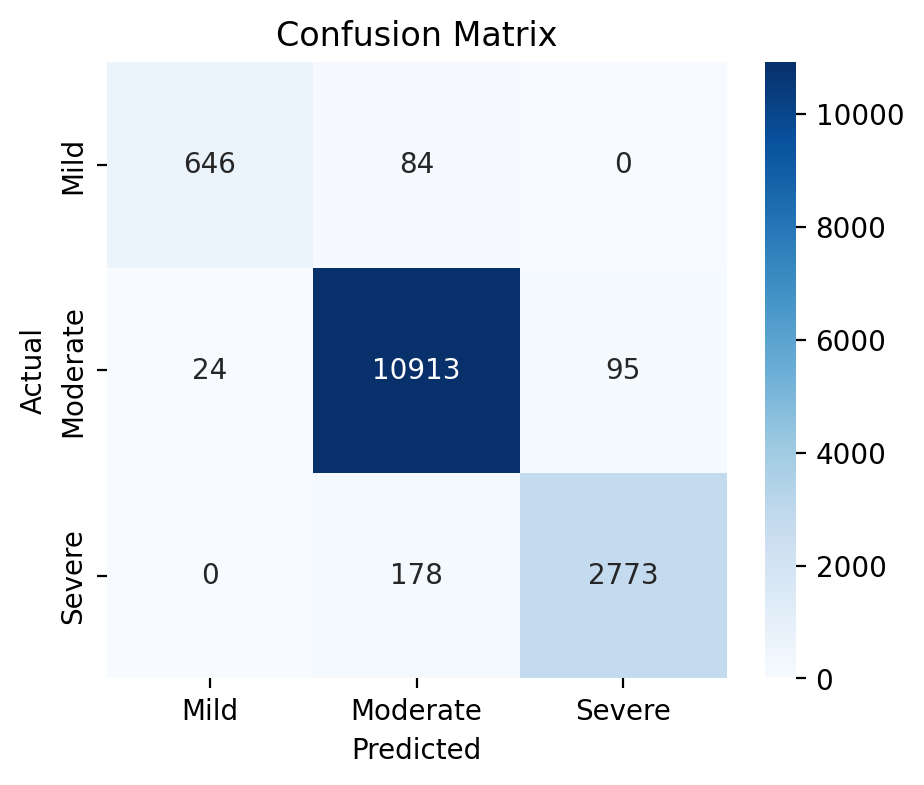

,Target_Severity_Score
0,Moderate
1,Moderate
2,Moderate
3,Moderate
4,Moderate


In [56]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

model = pickle.load(open('model_SVC.pkl', 'rb'))

y_pred = pd.DataFrame(model.predict(X_test), columns=['Target_Severity_Score'])

print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Mild', 'Moderate', 'Severe'], yticklabels=['Mild', 'Moderate', 'Severe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

y_pred['Target_Severity_Score'] = y_pred['Target_Severity_Score'].map({0: 'Mild', 1: 'Moderate', 2: 'Severe'})
y_pred.head()


In [57]:
# #predict

# y_pred = pd.DataFrame(grid_search.best_estimator_.predict(X_test), columns=['Target_Severity_Score'])
# y_pred.head()

In [58]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# print(classification_report(y_test, y_pred,digits=4))

# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
# 			xticklabels=['Mild', 'Moderate', 'Severe'], yticklabels=['Mild', 'Moderate', 'Severe'])
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()


### What is the Predictions Say ?

0 that indicates low severity (Mild)


1 that indicates medium severity (Moderate)


2 that indicates high severity (Severe)

In [59]:
# y_pred['Target_Severity_Score'] = y_pred['Target_Severity_Score'].map({0: 'Mild', 1: 'Moderate', 2: 'Severe'})
# y_pred.head()

#### Save Output

In [60]:
# #save to csv
# y_pred.to_csv('output.csv', index=False)

# DDN

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


In [62]:
from sklearn.preprocessing import OneHotEncoder

y_array = y.to_numpy().reshape(-1, 1)

# ohe to the y
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y_array)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_encoded, test_size=0.3, random_state=42)

In [64]:
KerasModel = keras.models.Sequential([
    keras.layers.Dense(8, activation='tanh', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(y_encoded.shape[1], activation='softmax') # multiclass
])

In [71]:
KerasModel.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [72]:
# history = KerasModel.fit(
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=100,
#     batch_size=100,
#     verbose=1,
#     callbacks=[tf.keras.callbacks.EarlyStopping(
#         patience=10,
#         monitor='val_accuracy',
#         restore_best_weights=True
#     )]
# )

Epoch 1/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9606 - loss: 0.1251 - val_accuracy: 0.9722 - val_loss: 0.1095
Epoch 2/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9647 - loss: 0.1187 - val_accuracy: 0.9592 - val_loss: 0.1240
Epoch 3/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9606 - loss: 0.1250 - val_accuracy: 0.9690 - val_loss: 0.1083
Epoch 4/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1129 - val_accuracy: 0.9750 - val_loss: 0.1040
Epoch 5/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9678 - loss: 0.1151 - val_accuracy: 0.9742 - val_loss: 0.1037
Epoch 6/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9673 - loss: 0.1136 - val_accuracy: 0.9431 - val_loss: 0.1469
Epoch 7/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9668 - loss: 0.1129 - val_accuracy: 0.9641 - val_loss: 0.1102
Epoch 8/100
344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9677 - loss: 0.1138 - val_acc

In [73]:
print(KerasModel.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,835 (136.08 KB)

 Trainable params: 11,611 (45.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,224 (90.72 KB)

None


In [74]:
KerasModel.save('KerasModel.keras')


In [75]:
NewKerasModel = keras.models.load_model('KerasModel.keras')

In [76]:
y_pred = NewKerasModel.predict(X_test)


460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [77]:
ModelLoss, ModelAccuracy = NewKerasModel.evaluate(X_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy))

460/460 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.1014
Model Loss is 0.09978193789720535
Model Accuracy is 0.9759396314620972


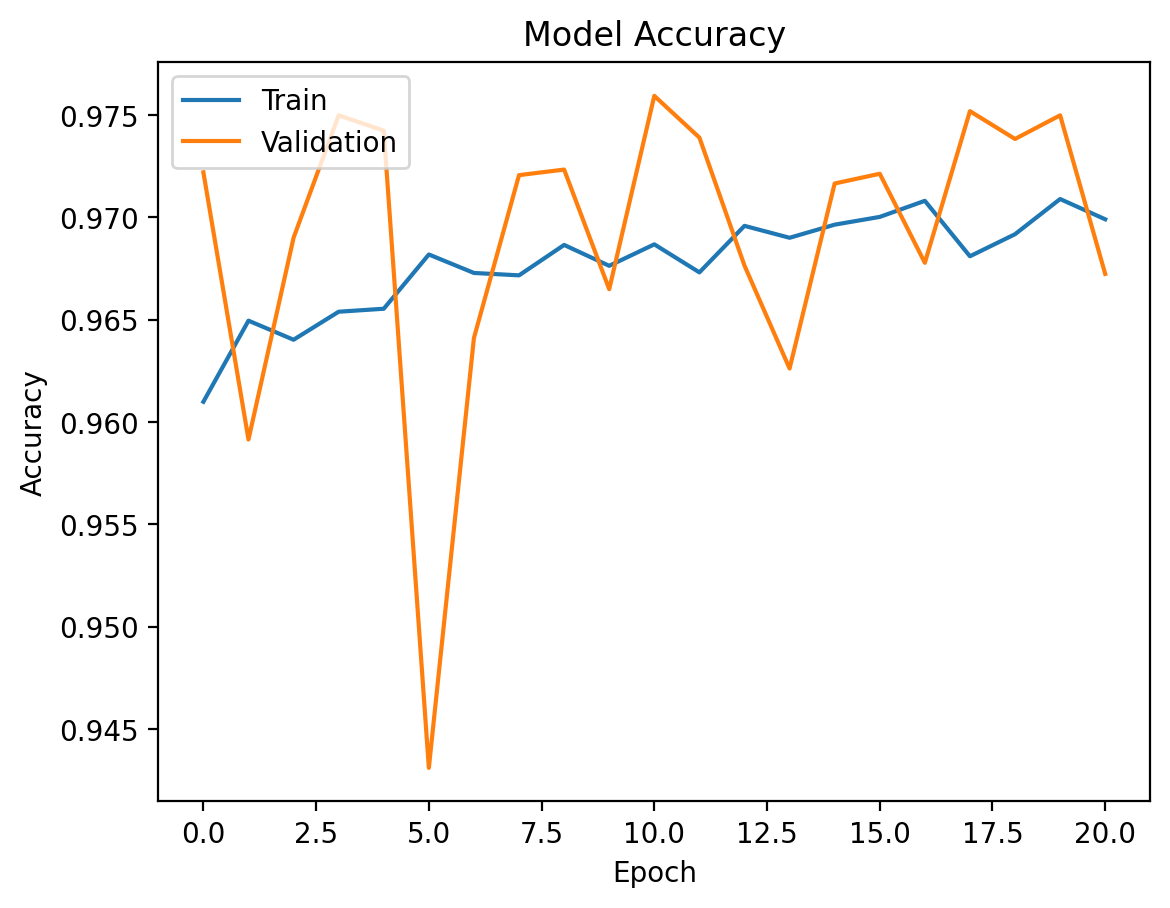

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

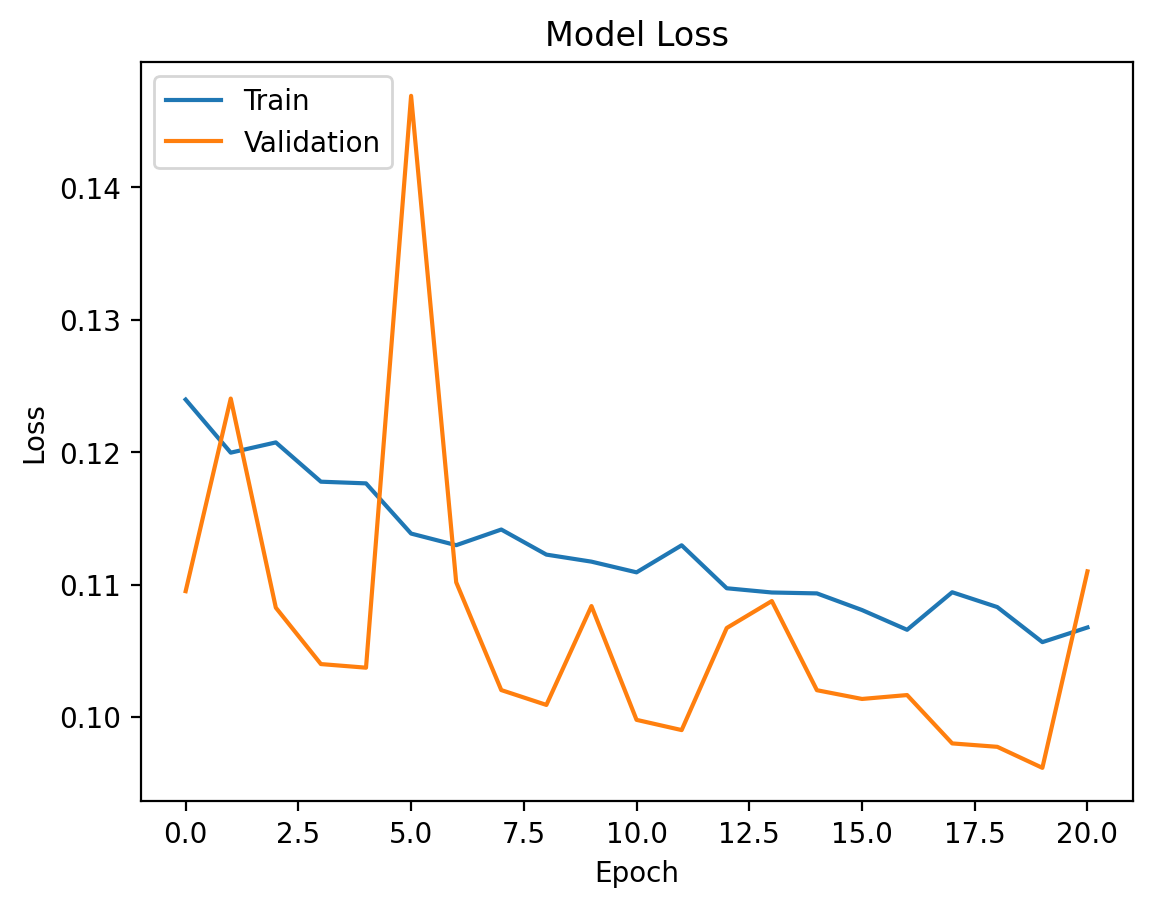

In [79]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [80]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
CM = confusion_matrix(y_true_classes, y_pred_classes)

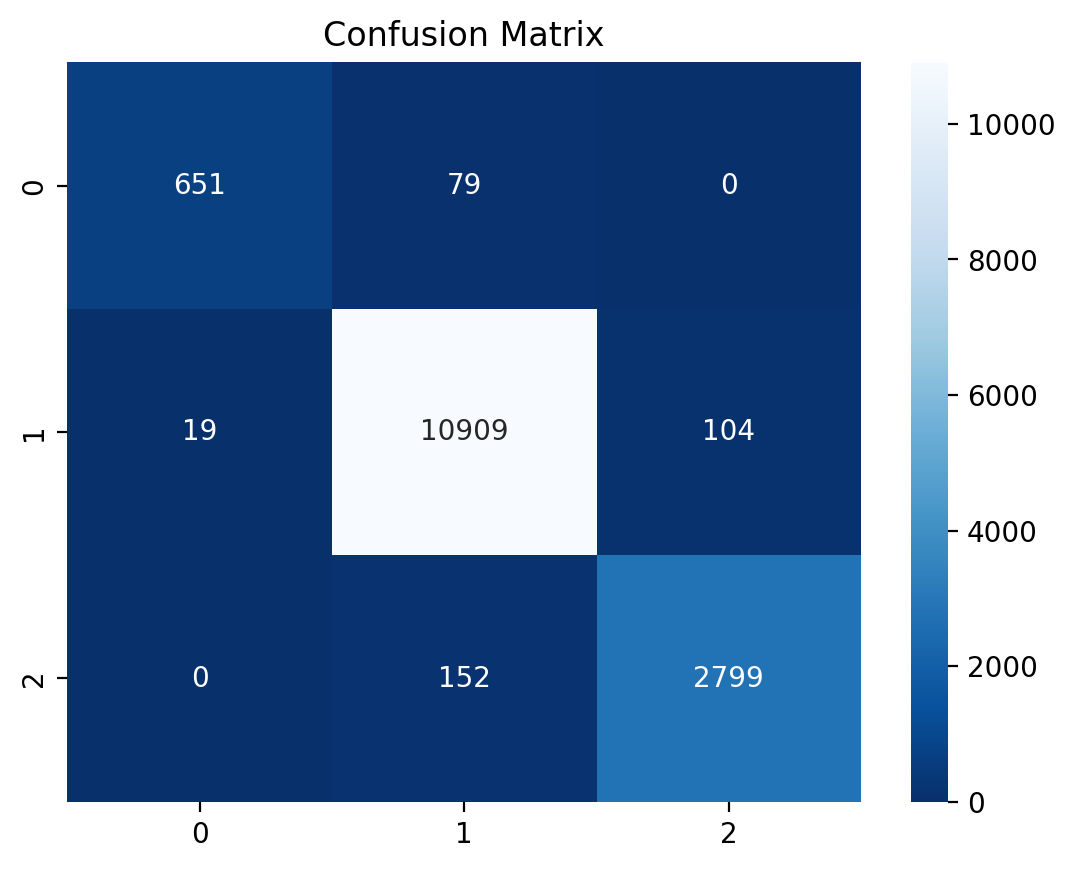

In [81]:
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues_r', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.title('Confusion Matrix')
plt.show()

In [82]:
y_true_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

class_names = encoder.categories_[0].astype(str)

ClassificationReport = classification_report(y_true_classes, y_pred_classes, target_names=class_names)
print('Classification Report:\n', ClassificationReport)


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93       730
           1       0.98      0.99      0.98     11032
           2       0.96      0.95      0.96      2951

    accuracy                           0.98     14713
   macro avg       0.97      0.94      0.96     14713
weighted avg       0.98      0.98      0.98     14713

